### **Package Importation and Data Acquisition**

In [23]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import datetime as dt
import pickle

In [24]:
df = pd.read_csv("sampled_no_retweet_df.csv", index_col=0)

In [25]:
# Checking some rows of the data 
df.head()

,id,created_at,created_at_ymd,full_tweet,quote_count,reply_count,retweet_count,favorite_count,favorited,retweeted,lang,timestamp_ms,retweeted_status,user_id,name,screen_name,description,followers_count,user_created_at,loc
1,1.395719e+18,Fri May 21 12:32:11 +0000 2021,2021-05-21,#covidlong #LongCovid #apresJ20,0.0,0.0,0.0,0.0,False,False,und,1.621600e+12,NaN,1298867975957684224,Florence COVID19 🦠🦠💉💉 (Covid Long),Covid19Florence,Premiers symptômes Covid 19 : le 09/03/2020,197,Thu Aug 27 06:20:46 +0000 2020,"Ile-de-France, France"
2,1.395741e+18,Fri May 21 13:57:35 +0000 2021,2021-05-21,#apresJ20 \n🤔\nhttps://t.co/H6mqURHflJ,0.0,0.0,0.0,0.0,False,False,und,1.621605e+12,NaN,1325373633502572544,Béret Vert,Bretvert1,LA LEGION FRANÇAISE Veut faire\nLA RÉVOLUTION ...,64,Sun Nov 08 09:44:52 +0000 2020,NaN
3,1.395741e+18,Fri May 21 14:01:16 +0000 2021,2021-05-21,#apresJ20 \nSuramine l antidote anti covid 🤔\n...,0.0,0.0,0.0,0.0,False,False,it,1.621606e+12,NaN,1325373633502572544,Béret Vert,Bretvert1,LA LEGION FRANÇAISE Veut faire\nLA RÉVOLUTION ...,64,Sun Nov 08 09:44:52 +0000 2020,NaN
4,1.397092e+18,Tue May 25 07:28:54 +0000 2021,2021-05-25,#J451 - L’article de @SuzanneBruneau1 sur mon ...,0.0,0.0,0.0,0.0,False,False,fr,1.621928e+12,NaN,37757950,Véronique Le Thiec 🍓Choyée Contaminée Réinfectée,lethiecv,"Parisienne, Dyonisienne, Bretonne, Française, ...",1442,Mon May 04 20:57:31 +0000 2009,NaN
6,1.397449e+18,Wed May 26 07:05:47 +0000 2021,2021-05-26,#apresJ20,0.0,0.0,0.0,0.0,False,False,und,1.622013e+12,NaN,120320839,ninasky,ninasky31000,mako assé véyé mwen\n❤️💚🖤\n#apresJ20 #covidlong,154,Sat Mar 06 03:13:24 +0000 2010,France


### **Helper Functions Definition**

In [26]:
from deep_translator import GoogleTranslator

def translate_tweets(tweets, target_language='en'):
    return [GoogleTranslator(source='auto', target=target_language).translate(tweet) for tweet in tweets]

### **Translation**

In [27]:
non_english_tweets = df[df['lang'] != 'en']

In [28]:
non_english_tweets

,id,created_at,created_at_ymd,full_tweet,quote_count,reply_count,retweet_count,favorite_count,favorited,retweeted,lang,timestamp_ms,retweeted_status,user_id,name,screen_name,description,followers_count,user_created_at,loc
1,1.395719e+18,Fri May 21 12:32:11 +0000 2021,2021-05-21,#covidlong #LongCovid #apresJ20,0.0,0.0,0.0,0.0,False,False,und,1.621600e+12,NaN,1298867975957684224,Florence COVID19 🦠🦠💉💉 (Covid Long),Covid19Florence,Premiers symptômes Covid 19 : le 09/03/2020,197,Thu Aug 27 06:20:46 +0000 2020,"Ile-de-France, France"
2,1.395741e+18,Fri May 21 13:57:35 +0000 2021,2021-05-21,#apresJ20 \n🤔\nhttps://t.co/H6mqURHflJ,0.0,0.0,0.0,0.0,False,False,und,1.621605e+12,NaN,1325373633502572544,Béret Vert,Bretvert1,LA LEGION FRANÇAISE Veut faire\nLA RÉVOLUTION ...,64,Sun Nov 08 09:44:52 +0000 2020,NaN
3,1.395741e+18,Fri May 21 14:01:16 +0000 2021,2021-05-21,#apresJ20 \nSuramine l antidote anti covid 🤔\n...,0.0,0.0,0.0,0.0,False,False,it,1.621606e+12,NaN,1325373633502572544,Béret Vert,Bretvert1,LA LEGION FRANÇAISE Veut faire\nLA RÉVOLUTION ...,64,Sun Nov 08 09:44:52 +0000 2020,NaN
4,1.397092e+18,Tue May 25 07:28:54 +0000 2021,2021-05-25,#J451 - L’article de @SuzanneBruneau1 sur mon ...,0.0,0.0,0.0,0.0,False,False,fr,1.621928e+12,NaN,37757950,Véronique Le Thiec 🍓Choyée Contaminée Réinfectée,lethiecv,"Parisienne, Dyonisienne, Bretonne, Française, ...",1442,Mon May 04 20:57:31 +0000 2009,NaN
6,1.397449e+18,Wed May 26 07:05:47 +0000 2021,2021-05-26,#apresJ20,0.0,0.0,0.0,0.0,False,False,und,1.622013e+12,NaN,120320839,ninasky,ninasky31000,mako assé véyé mwen\n❤️💚🖤\n#apresJ20 #covidlong,154,Sat Mar 06 03:13:24 +0000 2010,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305843,1.513767e+18,Tue Apr 12 06:32:57 +0000 2022,2022-04-12,Genau das! Und um noch einen Tweet zu zitieren...,0.0,0.0,0.0,0.0,False,False,de,1.649745e+12,NaN,1045764776,Uwe Isonfire,IsonfireUwe,er/ihm,60,Sat Dec 29 19:25:17 +0000 2012,Duesseldorf
305852,1.513767e+18,Tue Apr 12 06:33:10 +0000 2022,2022-04-12,Sigo tragando sushi... Por qué ni #lyme ni #sa...,0.0,0.0,0.0,0.0,False,False,es,1.649745e+12,NaN,93092910,ℭ𝔞𝔫𝔠𝔦ó𝔫 𝔡𝔢𝔩 𝔐𝔞𝔯,marlozanormz,Lic. en Admon de Negocios Internacionales. \nL...,205,Sat Nov 28 01:38:29 +0000 2009,"Querétaro Arteaga, México"
305873,1.513767e+18,Tue Apr 12 06:33:31 +0000 2022,2022-04-12,@MarcoZueri https://t.co/QkU1Yks73I,0.0,0.0,0.0,0.0,False,False,und,1.649745e+12,NaN,199748916,Andre Lachat,baldeagle_66,NaN,70,Thu Oct 07 16:58:47 +0000 2010,Schweiz
305890,1.513767e+18,Tue Apr 12 06:34:02 +0000 2022,2022-04-12,Gerade am Hören: Long Covid und Laufen - Alles...,0.0,0.0,0.0,0.0,False,False,de,1.649745e+12,NaN,1309031025524252676,R;,SociofugalSpace,♀️she/her/hers/PoC\n🎓Kulturanthro./Relwiss./Ge...,160,Thu Sep 24 07:25:22 +0000 2020,Earth


In [ ]:
translated_tweets = translate_tweets(non_english_tweets['full_tweet'])

In [ ]:
#datapath = '../data/'

In [ ]:
import pickle

with open('translated_non_retweeted_tweets_2022_04_12-08_34_59_AM' + filename, 'wb') as f:
  pickle.dump(translated_tweets, f)

In [ ]:
with open(datapath + 'translated/translated_german_' + filename, 'rb') as f:
  translated_german_tweets = pickle.load(f)

In [ ]:
len(translated_german_tweets)

In [ ]:
preprocessed_german_tweets = preprocess_tweets(translated_german_tweets)

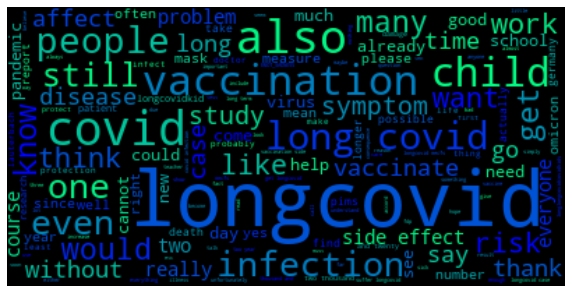

In [58]:
#with replacements and no stemming
plot_wordcloud_from_tweets(preprocessed_german_tweets)

In [ ]:
#without stemming
plot_wordcloud_from_tweets(preprocessed_german_tweets)

In [ ]:
#with stemming
plot_wordcloud_from_tweets(preprocessed_german_tweets)

#### French tweets discovery (After translation)

In [59]:
translated_french_tweets = translate_tweets(sampled_no_retweet_df[sampled_no_retweet_df['lang']=='fr']['full_tweet'])

In [98]:
import pickle

with open(datapath + 'translated/translated_french_' + filename, 'wb') as f:
  pickle.dump(translated_french_tweets, f)
 

In [45]:
with open(datapath + 'translated/translated_french_' + filename, 'rb') as f:
  translated_french_tweets = pickle.load(f)

In [ ]:
preprocessed_french_tweets = preprocess_tweets(translated_french_tweets)

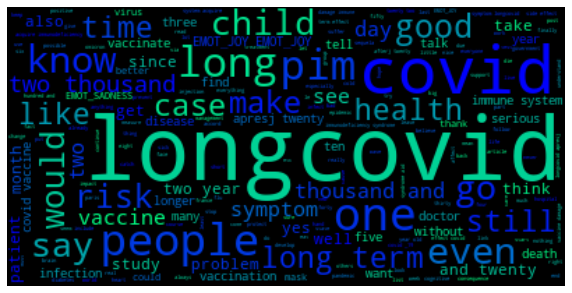

In [86]:
#with replacements and no stemming
plot_wordcloud_from_tweets(preprocessed_french_tweets)

#### Undetermined tweets discovery (After translation)

In [70]:
from deep_translator import single_detection

In [ ]:
lang = [single_detection(x, api_key='258da1680dd99f69a8581230f31d2067') for x in preprocessed_undetermined_tweets if x==x]
print(lang) # output: [fr, en]

In [ ]:
import pickle

with open(home + '/translated_undetermined_tweets.pkl', 'wb') as f:
  pickle.dump(translated_undetermined_tweets, f)
 

In [ ]:
#with open(home + '/translated_german_tweets.pkl', 'rb') as f:
#  mynewlist = pickle.load(f)

In [ ]:
type(translated_undetermined_tweets)

list

In [ ]:
preprocessed_undetermined_tweets = preprocess_tweets(sampled_no_retweet_df[sampled_no_retweet_df['lang']=='und']['full_tweet'])

In [ ]:
preprocessed_undetermined_tweets

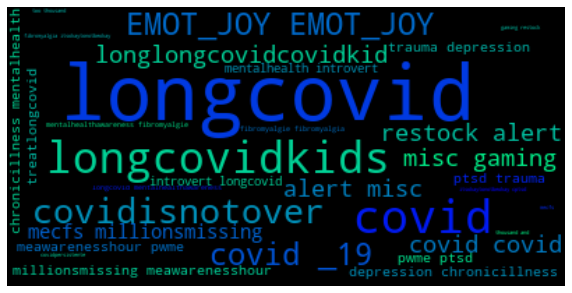

In [79]:
plot_wordcloud_from_tweets(preprocessed_undetermined_tweets)

#### Combined languages tweets discovery (After translation)

In [ ]:
preprocessed_tweets

In [ ]:
en_de_fr_preprocessed_tweets = []
en_de_fr_preprocessed_tweets.extend(preprocessed_tweets)
en_de_fr_preprocessed_tweets.extend(preprocessed_german_tweets)
en_de_fr_preprocessed_tweets.extend(preprocessed_french_tweets)


In [100]:
len(en_de_fr_preprocessed_tweets)

27433

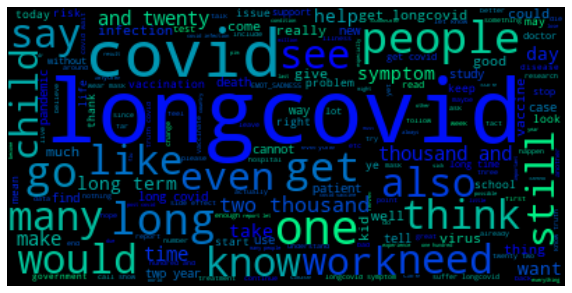

In [101]:
plot_wordcloud_from_tweets(en_de_fr_preprocessed_tweets)

In [2]:
!pip install gensim

  Using cached gensim-4.1.2.tar.gz (23.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for gensim, since package 'wheel' is not installed.
  Running setup.py install for gensim: started
  Running setup.py install for gensim: finished with status 'done'


In [3]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hayadi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [103]:
stop_words = stopwords.words('english')
stop_words.extend(['and', 'one', 'get', 'go', 'u', 'take', 'one', 'two'])

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [107]:
# remove stop words
data_words = remove_stopwords(en_de_fr_preprocessed_tweets)

In [108]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1)]


In [109]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.043*"longcovid" + 0.035*"covid" + 0.018*"vaccine" + 0.016*"long" + '
  '0.011*"know" + 0.010*"people" + 0.009*"vaccination" + 0.008*"effect" + '
  '0.007*"risk" + 0.007*"twenty"'),
 (1,
  '0.032*"longcovid" + 0.024*"covid" + 0.012*"long" + 0.009*"study" + '
  '0.008*"new" + 0.008*"health" + 0.007*"patient" + 0.005*"syndrome" + '
  '0.004*"well" + 0.004*"post"'),
 (2,
  '0.038*"covid" + 0.033*"longcovid" + 0.025*"long" + 0.009*"people" + '
  '0.007*"time" + 0.007*"child" + 0.007*"mask" + 0.007*"year" + 0.006*"say" + '
  '0.006*"like"'),
 (3,
  '0.051*"longcovid" + 0.023*"covid" + 0.014*"people" + 0.008*"many" + '
  '0.008*"symptom" + 0.006*"infection" + 0.006*"would" + 0.006*"also" + '
  '0.006*"know" + 0.005*"vaccination"'),
 (4,
  '0.049*"longcovid" + 0.009*"day" + 0.009*"twenty" + 0.009*"emot_joy" + '
  '0.008*"pims" + 0.007*"people" + 0.006*"mecfs" + 0.006*"covid" + '
  '0.005*"year" + 0.005*"long"')]
